In [1]:
import pandas as pd
import requests
import seaborn as sn 
import matplotlib.pyplot as plt
import io

### Vaccinations

In [13]:
df = pd.read_csv('/Users/jakobschlierf/Downloads/United States.csv')

In [21]:
df.columns

Index(['location', 'date', 'vaccine', 'source_url', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters'],
      dtype='object')

In [20]:
df.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
count,5.980000e+02,5.980000e+02,5.980000e+02,5.980000e+02
mean,3.849227e+08,1.888553e+08,1.586912e+08,4.455610e+07
std,1.890553e+08,7.971740e+07,7.438822e+07,5.026301e+07
min,3.641900e+04,2.976300e+04,7.581000e+03,0.000000e+00
25%,2.834389e+08,1.597107e+08,1.292769e+08,7.204000e+03
50%,4.086935e+08,2.167412e+08,1.919991e+08,9.690542e+06
75%,5.602752e+08,2.544772e+08,2.173735e+08,9.865889e+07
max,6.042360e+08,2.615914e+08,2.230356e+08,1.280593e+08


In [23]:
df[df['date'] == '2022-07-01']

,location,date,vaccine,source_url,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
565,United States,2022-07-01,"Johnson&Johnson, Moderna, Pfizer/BioNTech",https://data.cdc.gov/Vaccinations/COVID-19-Vac...,597086225,260067050,222184716,123811860


In [25]:
df.tail(1)

,location,date,vaccine,source_url,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
597,United States,2022-08-02,"Johnson&Johnson, Moderna, Pfizer/BioNTech",https://data.cdc.gov/Vaccinations/COVID-19-Vac...,604235972,261591428,223035566,128059290


In [15]:
df.total_vaccinations.sum()

230183750047

### Network Identifying Data

In [2]:
df = pd.read_pickle('../../Files/Identifying_Subs/test_0613_raw2.pickle')

In [4]:
df.shape

(1512133, 13)

In [5]:
df2 = pd.read_pickle('../../Files/Identifying_Subs/test_0613_raw3.pickle')

In [8]:
df2.shape

(43004, 13)

In [9]:
1512133 + 43004

1555137

## Training / Test Set statistics

In [2]:
train_data = pd.read_pickle('../../Files/Submissions/train/train_split_submission.pickle') 
valid_data = pd.read_pickle('../../Files/Submissions/train/val_split_submission.pickle')
test_data = pd.read_pickle('../../Files/Submissions/train/test_split_submission.pickle')

In [3]:
print(train_data.shape, valid_data.shape, test_data.shape)

(69000, 11) (15200, 11) (1408474, 11)


In [14]:
length = [] 
for i, j in train_data.iterrows():
    length.append(len(j['cleanTitle']))



(array([1.4568e+04, 2.1616e+04, 1.3769e+04, 8.0870e+03, 4.4980e+03,
        2.3770e+03, 1.2280e+03, 8.4600e+02, 5.8900e+02, 4.6300e+02,
        3.4700e+02, 2.5600e+02, 1.6000e+02, 1.0400e+02, 4.5000e+01,
        2.9000e+01, 7.0000e+00, 7.0000e+00, 2.0000e+00, 2.0000e+00]),
 array([  0.  ,  14.85,  29.7 ,  44.55,  59.4 ,  74.25,  89.1 , 103.95,
        118.8 , 133.65, 148.5 , 163.35, 178.2 , 193.05, 207.9 , 222.75,
        237.6 , 252.45, 267.3 , 282.15, 297.  ]),
 <BarContainer object of 20 artists>)

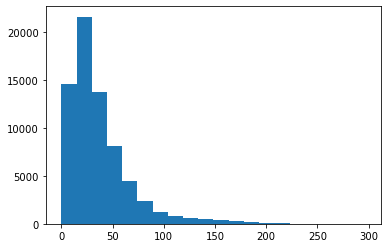

In [15]:
plt.hist(length, bins=20)

In [16]:
length = [] 
for i, j in valid_data.iterrows():
    length.append(len(j['cleanTitle']))


(array([3.169e+03, 4.206e+03, 2.879e+03, 1.769e+03, 1.229e+03, 6.870e+02,
        3.980e+02, 2.410e+02, 1.920e+02, 9.400e+01, 9.300e+01, 8.100e+01,
        6.000e+01, 4.200e+01, 2.600e+01, 1.500e+01, 1.300e+01, 3.000e+00,
        1.000e+00, 2.000e+00]),
 array([  0.  ,  13.25,  26.5 ,  39.75,  53.  ,  66.25,  79.5 ,  92.75,
        106.  , 119.25, 132.5 , 145.75, 159.  , 172.25, 185.5 , 198.75,
        212.  , 225.25, 238.5 , 251.75, 265.  ]),
 <BarContainer object of 20 artists>)

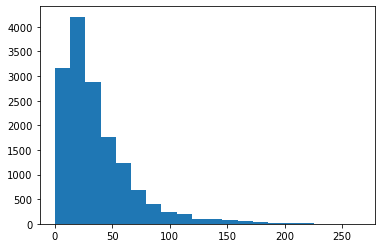

In [17]:
#plot histogram of lengths
plt.hist(length, bins=20)

In [18]:
length = []
for i, j in test_data.iterrows():
    length.append(len(j['cleanTitle']))


(array([5.16105e+05, 4.83607e+05, 2.17514e+05, 9.23360e+04, 4.48750e+04,
        2.29470e+04, 1.12170e+04, 6.72500e+03, 4.70800e+03, 3.15700e+03,
        2.11600e+03, 1.46600e+03, 8.12000e+02, 4.85000e+02, 2.18000e+02,
        7.70000e+01, 4.10000e+01, 4.10000e+01, 1.20000e+01, 1.50000e+01]),
 array([  0.  ,  15.35,  30.7 ,  46.05,  61.4 ,  76.75,  92.1 , 107.45,
        122.8 , 138.15, 153.5 , 168.85, 184.2 , 199.55, 214.9 , 230.25,
        245.6 , 260.95, 276.3 , 291.65, 307.  ]),
 <BarContainer object of 20 artists>)

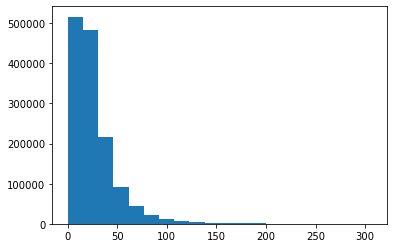

In [19]:
plt.hist(length, bins=20)